# COMP0189: Applied Artificial Intelligence
## Week 1 (Data Preprocessing)

### After this week you will be able to ...
- Load datasets using scikit-learn.
- Appreciate the importance of exploratory data analysis (EDA).
- Learn and apply various preprocessing techniques (scaling, encoding, handling missing values).
- Compare the impact of preprocessing on model performance.

### Acknowledgements
- https://github.com/UCLAIS/Machine-Learning-Tutorials
- https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/
- https://scikit-learn.org/stable/
- https://archive.ics.uci.edu/ml/datasets/adult

## Introduction to Scikit-learn


Why do we use sklearn??

1. Example Datasets
    - sklearn.datasets : Provides example datasets

2. Feature Engineering  
    - sklearn.preprocessing : Variable functions as to data preprocessing
    - sklearn.feature_selection : Help selecting primary components in datasets
    - sklearn.feature_extraction : Vectorised feature extraction
    - sklearn.decomposition : Algorithms regarding Dimensionality Reduction

3. Data split and Parameter Tuning  
    - sklearn.model_selection : 'Train Test Split' for cross validation, Parameter tuning with GridSearch

4. Evaluation  
    - sklearn.metrics : accuracy score, ROC curve, F1 score, etc.

5. ML Algorithms
    - sklearn.ensemble : Ensemble, etc.
    - sklearn.linear_model : Linear Regression, Logistic Regression, etc.
    - sklearn.naive_bayes : Gaussian Naive Bayes classification, etc.
    - sklearn.neighbors : Nearest Centroid classification, etc.
    - sklearn.svm : Support Vector Machine
    - sklearn.tree : DecisionTreeClassifier, etc.
    - sklearn.cluster : Clustering (Unsupervised Learning)

6. Utilities  
    - sklearn.pipeline: pipeline of (feature engineering -> ML Algorithms -> Prediction)

7. Train and Predict  
    - fit()
    - predict()

8. and more...

In [ ]:
%pip install scikit-learn==1.7.2 matplotlib==3.10.8 pandas==2.3.3 seaborn==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## 1. Exploratory Data Analysis (EDA)
In this section, you will use two datasets to illustrate EDA for: 1) a regression task and 2) a classification task.

### **1.1 California House Price Dataset** (regression task)




> Take some time to look at the different predictor variables. What do they mean and how do you expect them to influence the target variable (median house price)?






In [ ]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print('California dataset feature names: ', housing.feature_names)
print('Number of features: ', len(housing.feature_names))

California dataset feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Number of features:  8


**Exploratory data analysis**

Why is this useful?
- Understand dataset characetristic in more detail (range, distribution, inter-variable relationships).
- Identify necessary preprocessing steps (handle missing values and outliers, encoding and scaling features..).

In [ ]:
# convert the dataset into a dataframe
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# extract the target variable - MEDV = median house value (in $100,000s)
df['MEDV'] = housing.target

Basic statistics

In [ ]:
print("Dataset sample:")
print(df.head())
print("Basic statistics:")
print(df.describe())

Dataset sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Basic statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333

Visualise the feature and target distributions - are all features continuous?

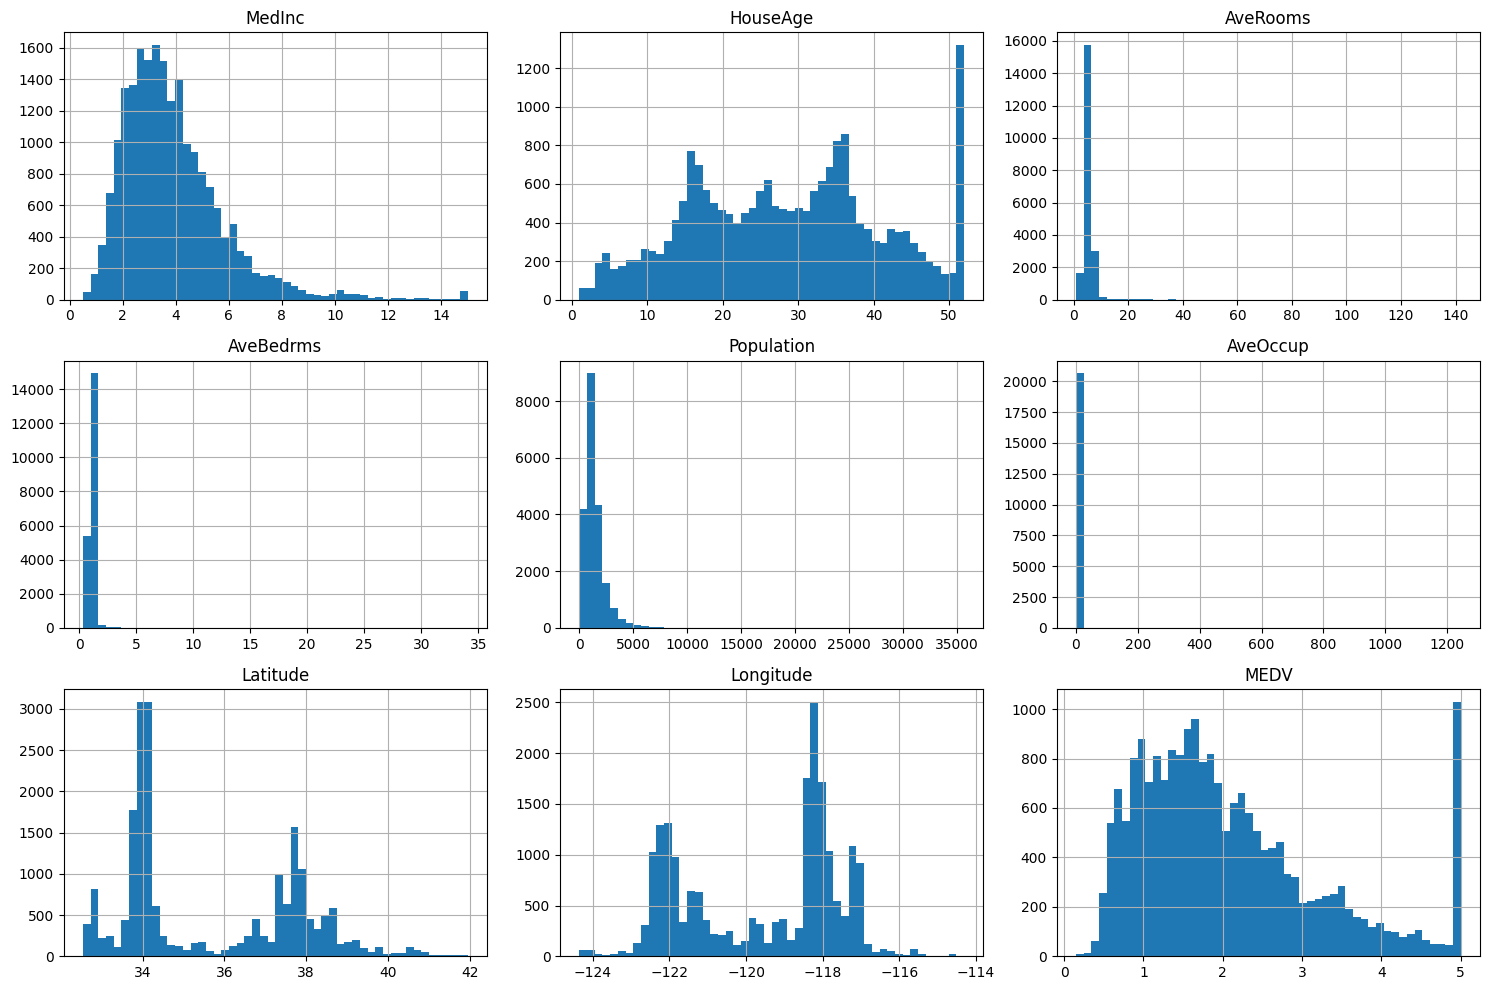

In [ ]:
df.hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

Are there any missing values?

In [ ]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


Checking for outliers

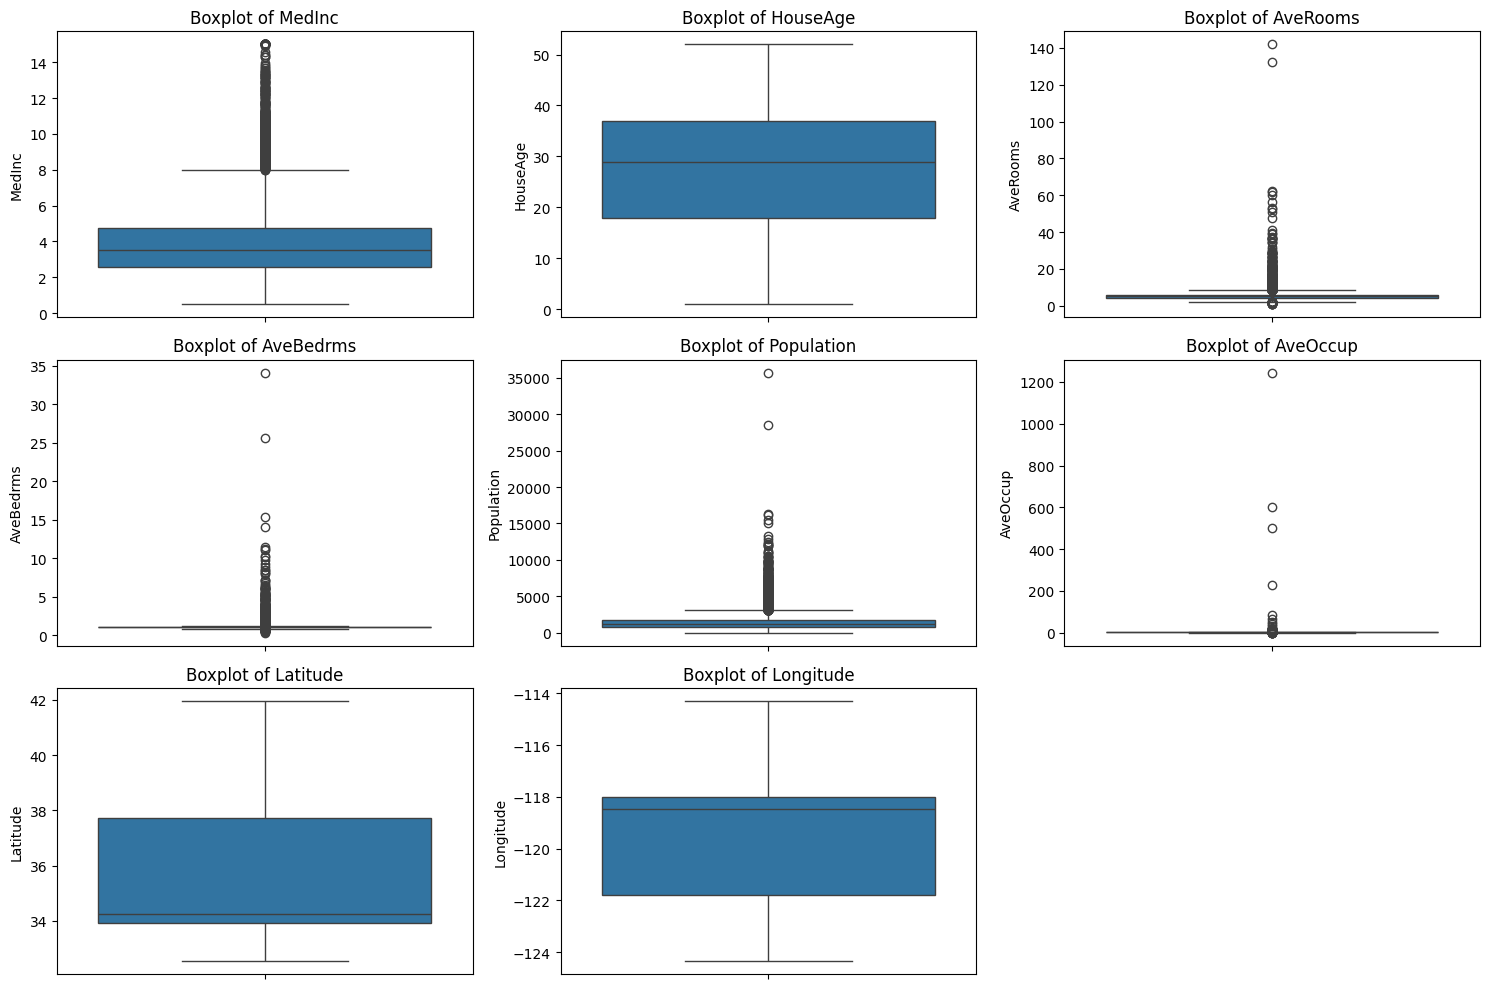

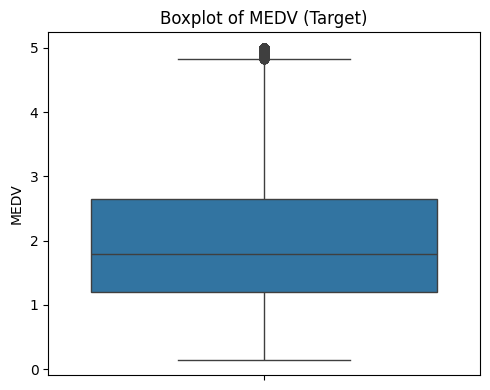

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]): # Exclude 'MEDV' (target) for now
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of MEDV (Target)')
plt.tight_layout()
plt.show()

Using a corelation heatmap to Investigate the relationships between features and the outcome variable.




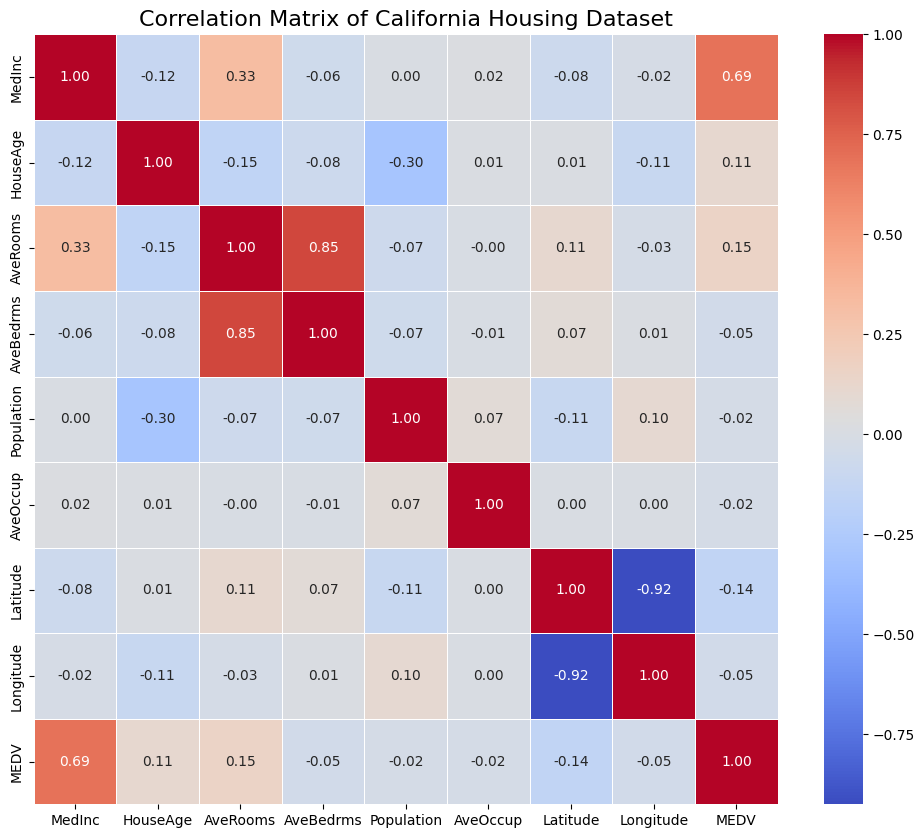

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of California Housing Dataset', fontsize=16)
plt.show()

Based on the EDA, we obeserved:
- Do some features need encoding?

 All features in the California Housing dataset (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude) are numerical. The target variable (MEDV) is also numerical. Therefore, no features need encoding (like one-hot encoding or ordinal encoding) for this dataset.
- Do all feature share a similar range, or would they need scaling?

 The features do not share a similar range and would significantly benefit from scaling. Looking at the basic statistics (df.describe()) and histograms, there's a wide variance in scales.

- Are there any outliers or missing values that need to be taken care of?

There are no missing values in any of the features or the target variable. This simplifies the preprocessing steps as no imputation is required.

However, the boxplots reveal the presence of significant outliers in several features:
Depending on the chosen model and its sensitivity to outliers, these might need to be addressed (e.g., Winsorization, robust scaling, or using models less sensitive to extreme values).

By addressing these questions, we inform our preprocessing choices and make sure that the data is properly prepared for the models.

### **1.2 Wine Dataset** (classification task)

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
# Load and describe the dataset
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

**Exploratory data analysis**

Just like for the housing dataset, it's helpful to analyse the dataset's features and predictor variable relationships.

In [ ]:
# convert into a dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
# extract the target variable
df['Class'] = wine.target

Basic statistics


In [ ]:
print("Dataset sample: ")
print(df.head())
print("Basic statistics:")
print(df.describe())

print("Dataset balance: ", df['Class'].value_counts())

Dataset sample: 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Cla

Checking feature distribution



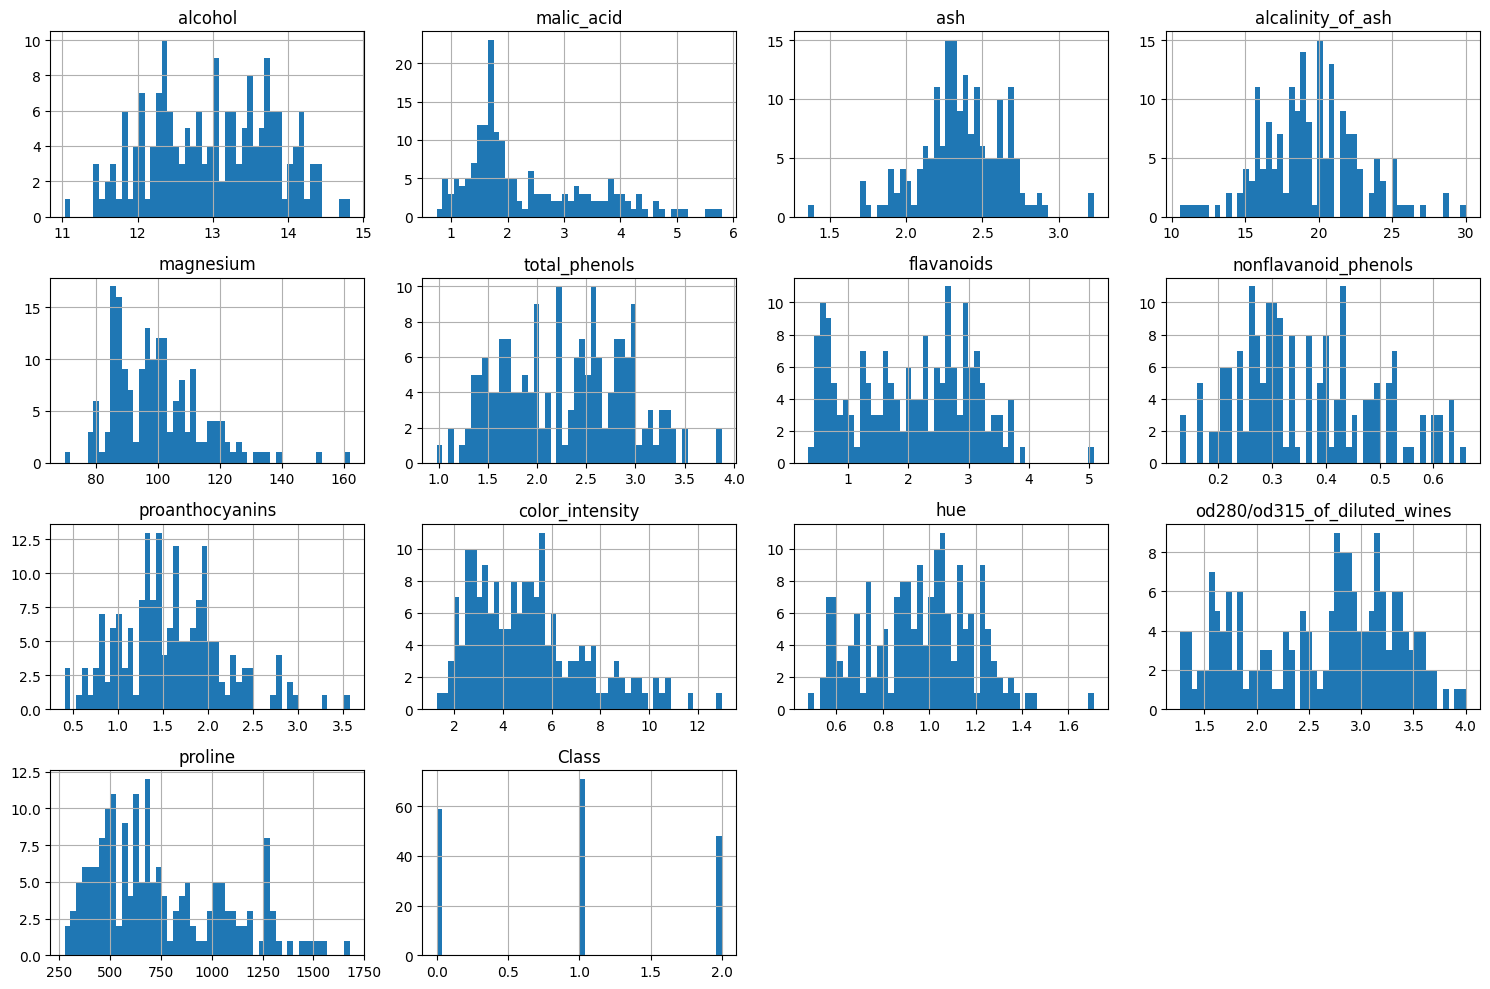

In [ ]:
df.hist(figsize=(15, 10), bins=50)
plt.tight_layout()
plt.show()

Checking for missing values, and outliers



In [ ]:
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64


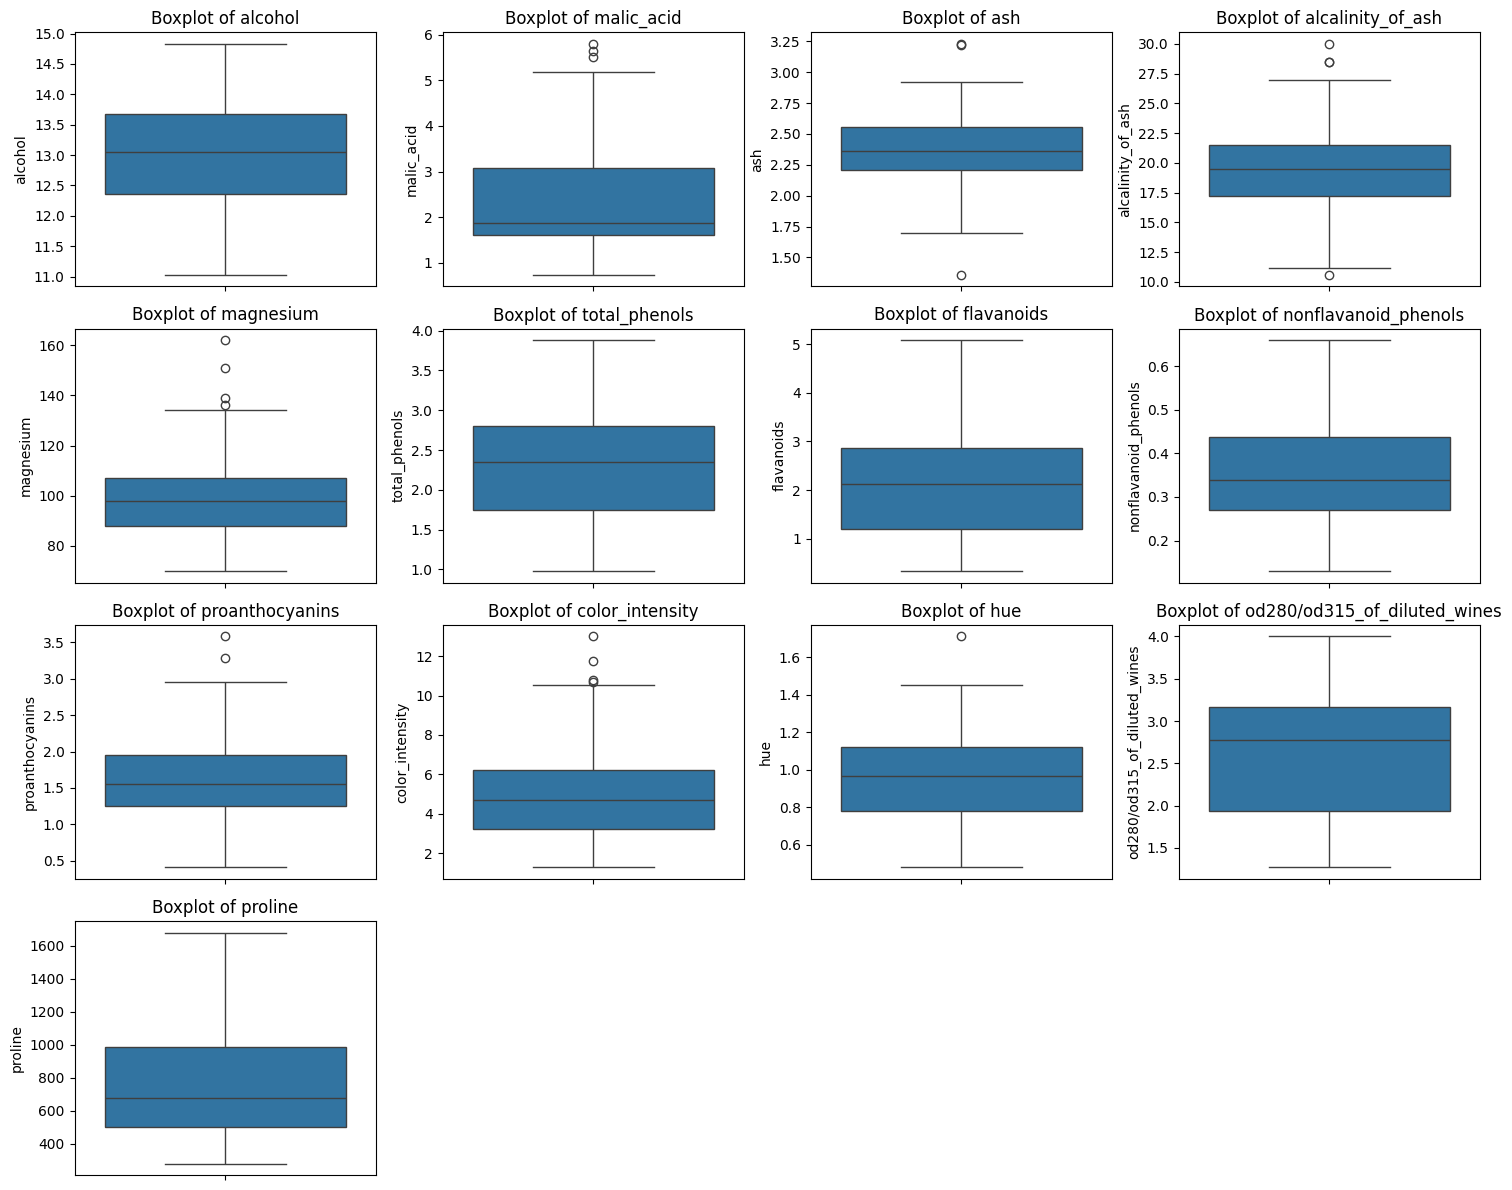

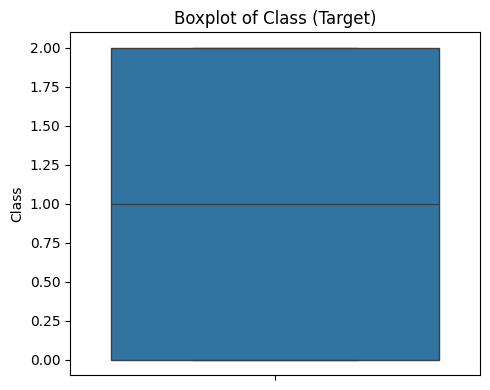

In [ ]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns[:-1]): # Exclude 'Class' (target) for now
    plt.subplot(4, 4, i + 1) # Adjust subplot grid as needed, 13 features + 1 target
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(y=df['Class'])
plt.title('Boxplot of Class (Target)')
plt.tight_layout()
plt.show()

Plotting feature distribution stratified on outcome to check how the features correlate with the outcome.



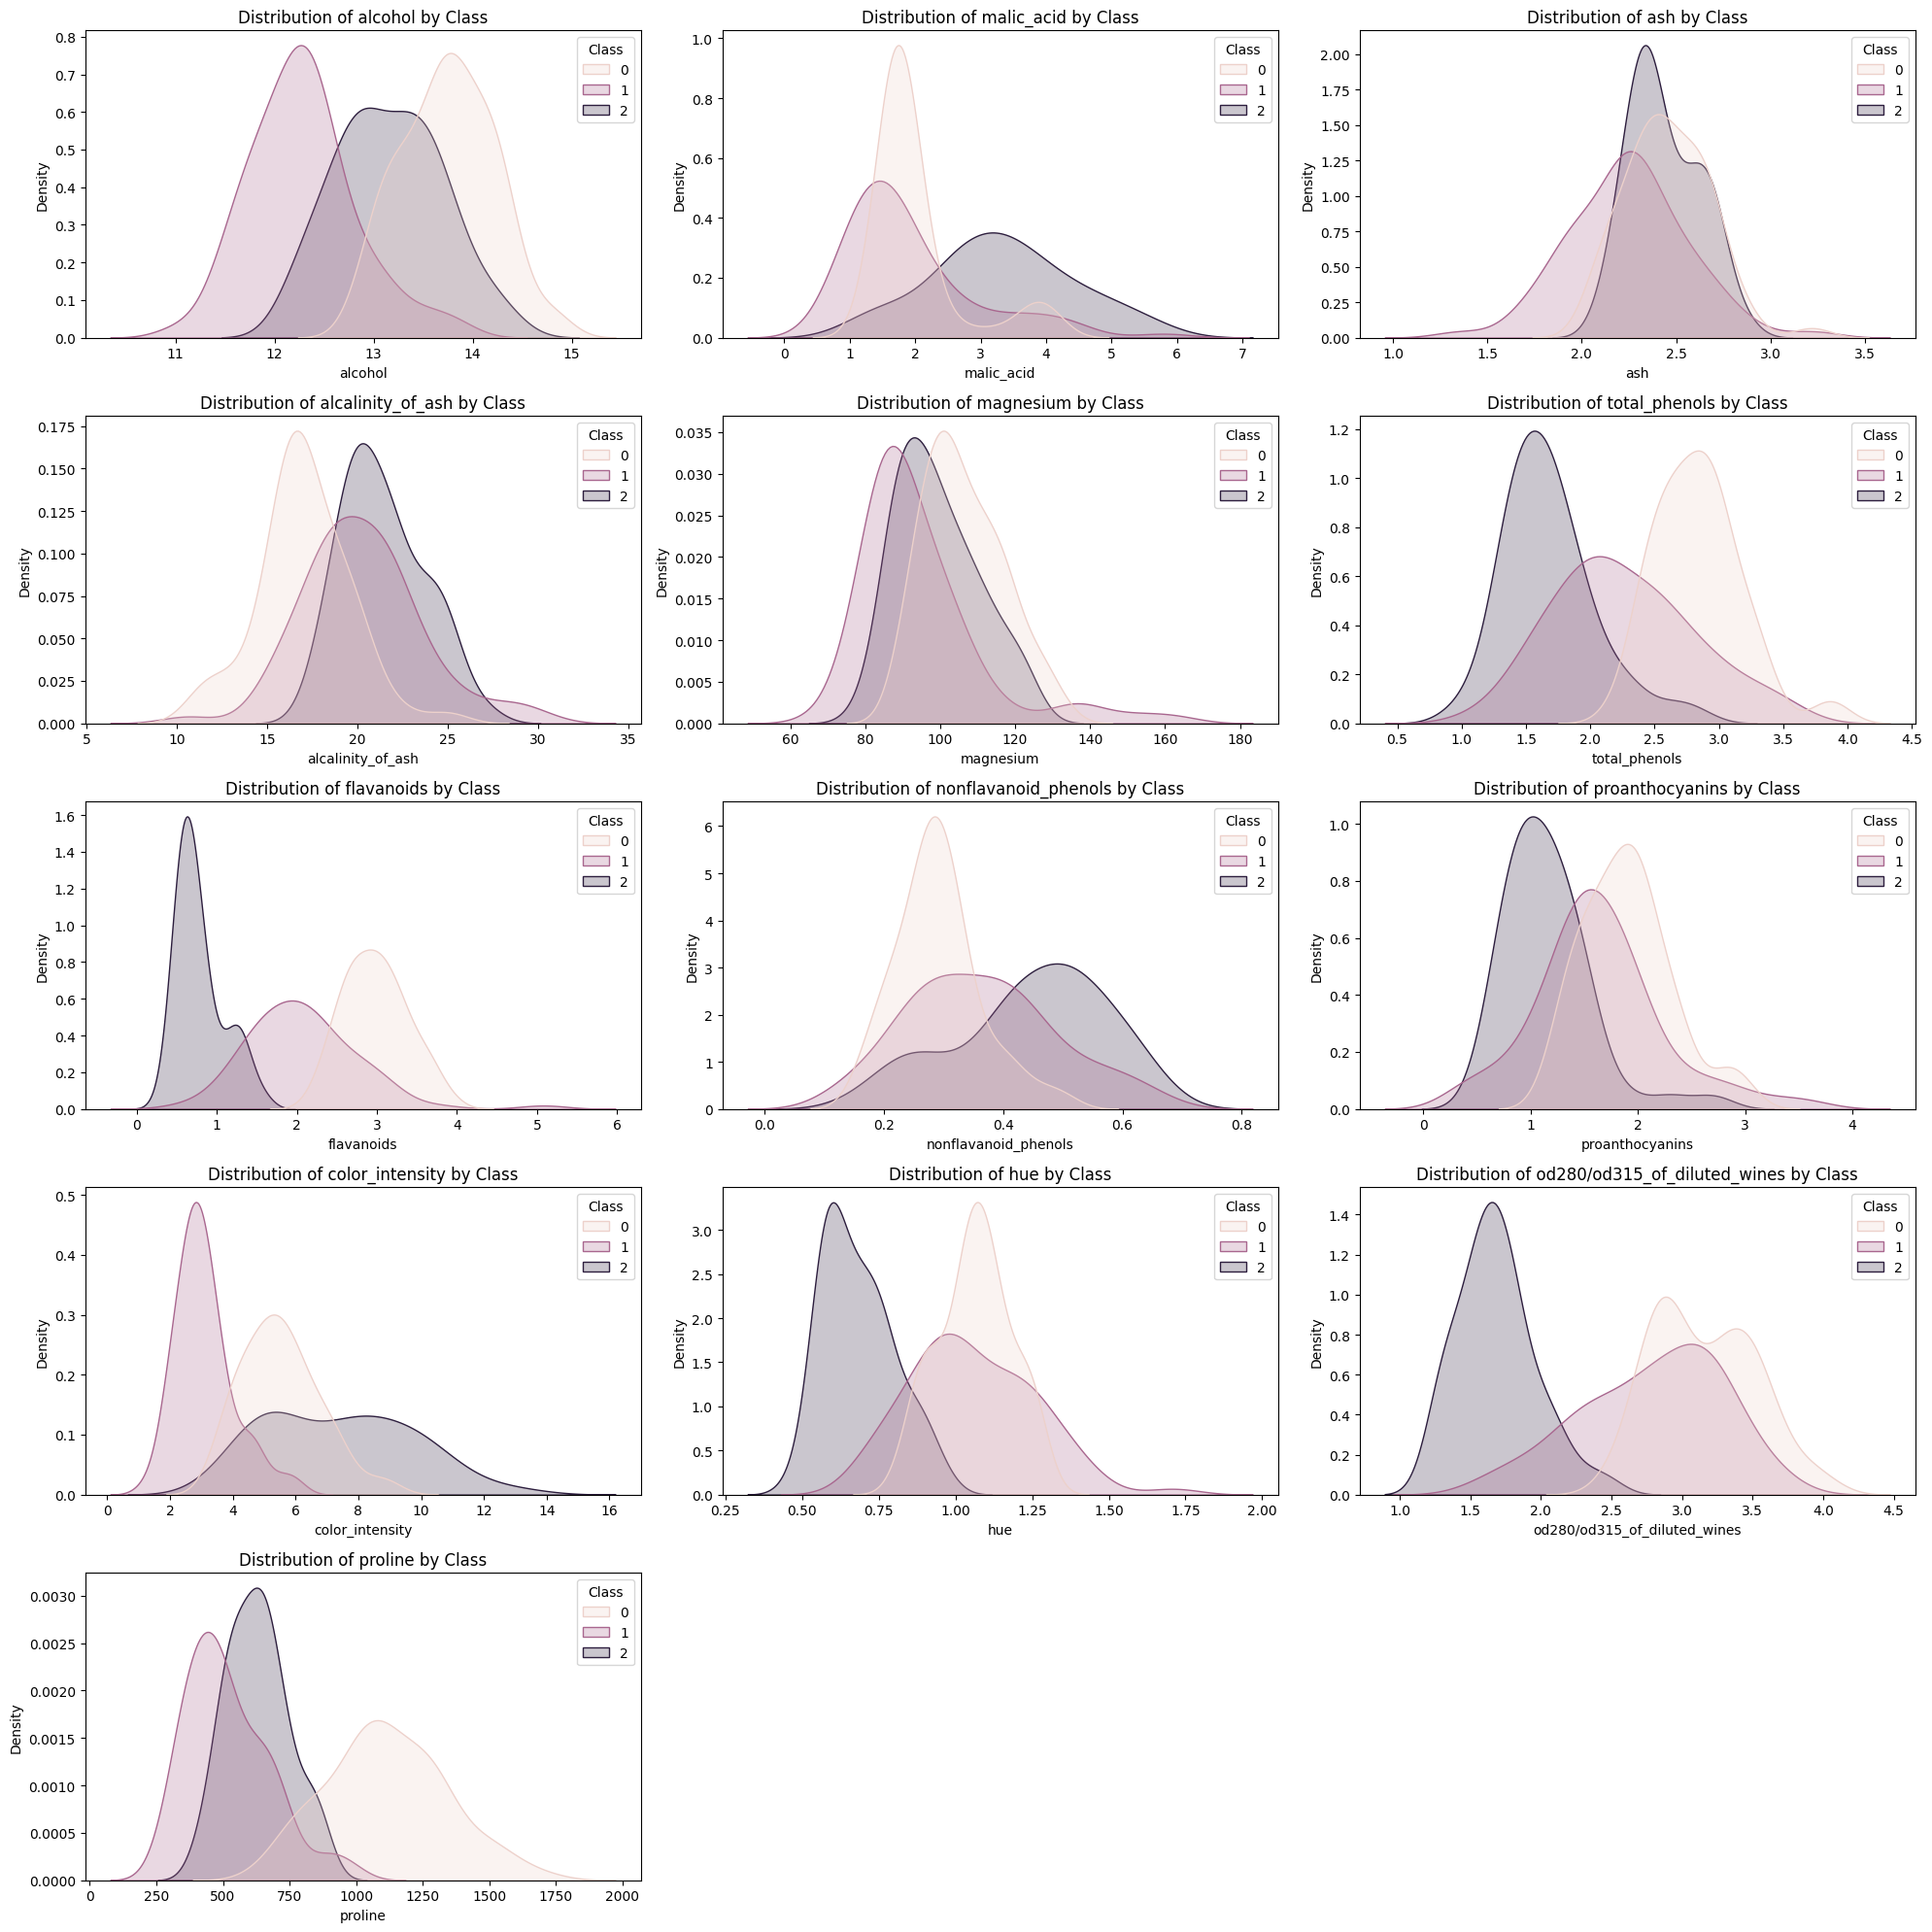

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns[:-1]): # Exclude 'Class' (target)
    plt.subplot(5, 3, i + 1) # Adjust subplot grid as needed for 13 features
    sns.kdeplot(data=df, x=column, hue='Class', fill=True, common_norm=False)
    plt.title(f'Distribution of {column} by Class')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

## 2. Investigating impact of pre-processing on differentent models

In this section, you have to design: <br>
<br>1) A model to predict the wine class of different wine samples (wine dataset).
<br>2) A model to predict the house price class (housing dataset).

Try out different models and compare them.


Based on the EDA, what preprocessing steps are needed? Try to compare different preprocessing methods (e.g., feature scaling methods) to assess their impact on the models.

Helpful imports

In [ ]:
# some models..
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# evaluation metrics..
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# different scalers to try out..
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# if you want to make a pipeline
from sklearn.pipeline import make_pipeline

# to split data into train and test sets..
from sklearn.model_selection import train_test_split

### Example: Impact of feature scaling

Normalization scales each input variable separately to the range 0-1.  
Standardization scales each input variable separately by subtracting the mean (centering) and dividing each of them by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

#### Example usage of sklearn.preprocessing.StandardScaler

In [ ]:
# Example
unscaled_data = np.asarray([[100, 0.001],
 [8, 0.05],
 [50, 0.005],
 [88, 0.07],
 [4, 0.1]])
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_data = scaler.fit_transform(unscaled_data)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

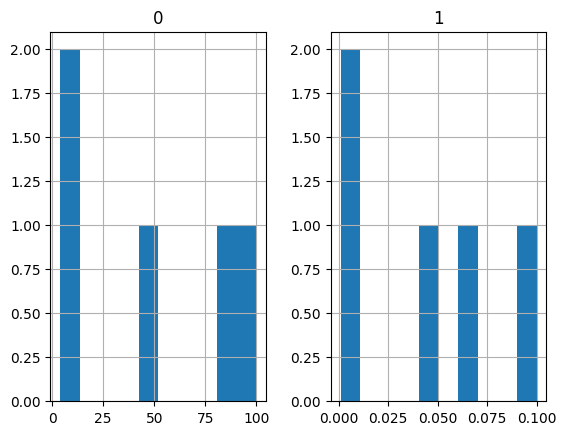

In [ ]:
pd.DataFrame(unscaled_data).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

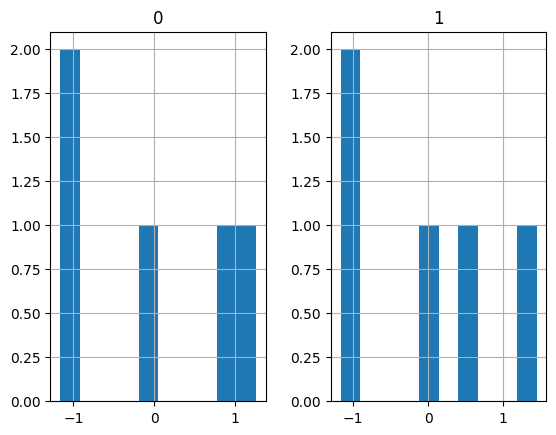

In [ ]:
pd.DataFrame(scaled_data).hist()

In [ ]:
del scaled_data, unscaled_data, scaler

**Tasks**  
- Trying different scaling methods, such as MinMaxScaler and Normalisation. INvestigating any differences
- Experimenting the effects of different feature scaling methods on various ML algorithms e.g. KNN, SVM, Decision-Tree.

#### Scaling vs. Unscaling the Wine Dataset

In [ ]:
RANDOM_STATE = 42
# We are using the wine dataset
features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=RANDOM_STATE)

In [ ]:
RANDOM_STATE = 42
# We are using the wine dataset
features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=RANDOM_STATE)

# Define scalers and models
scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=RANDOM_STATE),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=RANDOM_STATE)
}

# Store results as: results[model][scaler] = accuracy
results = {model_name: {} for model_name in models}

# Iterate over each model
for model_name, model in models.items():
    # Iterate over each scaler
    for scaler_name, scaler in scalers.items():

        # Scale if needed
        if scaler is None:
             Xtr, Xte = X_train, X_test
        else:
             scaler.fit(X_train)
             Xtr = scaler.transform(X_train)
             Xte = scaler.transform(X_test)

        # Fit + predict
        model.fit(Xtr, y_train)
        y_hat = model.predict(Xte)

        # Save accuracy
        results[model_name][scaler_name] = accuracy_score(y_test, y_hat)

# Convert to DataFrame (rows=models, cols=scalers)
results_df = pd.DataFrame(results).T
results_df

,None,StandardScaler,MinMaxScaler
KNeighborsClassifier,0.740741,0.962963,0.944444
SVC,0.759259,0.981481,0.981481
DecisionTreeClassifier,0.962963,0.962963,0.962963


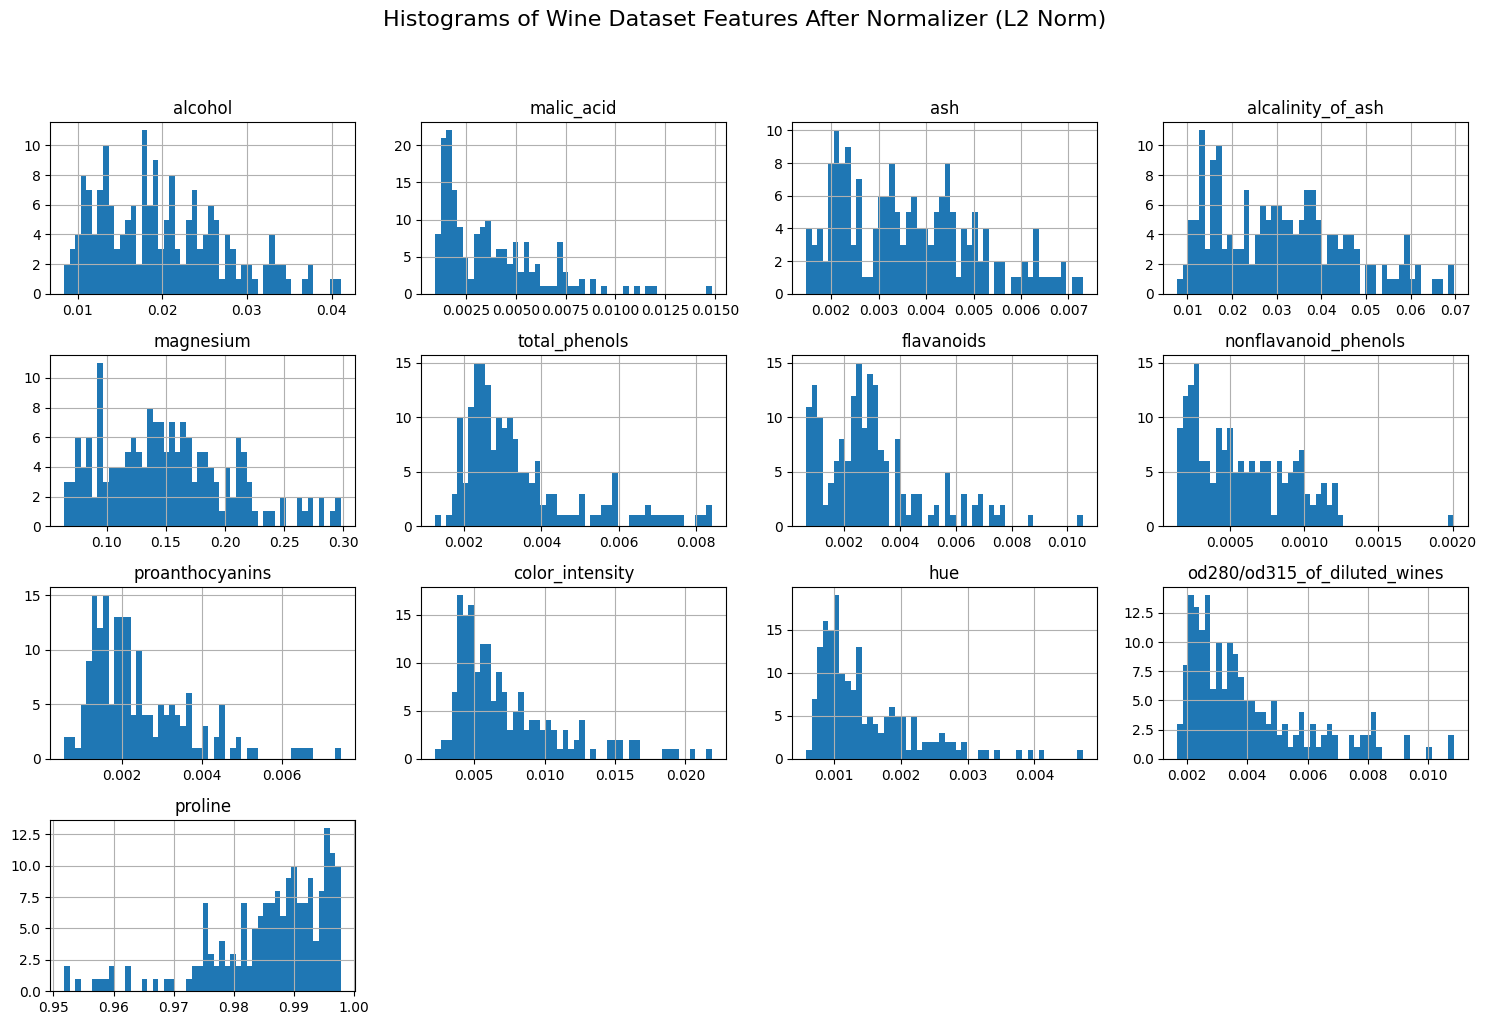

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['Class'] = wine.target

# Initialize Normalizer (L2 norm by default)
normalizer = Normalizer()

# Apply normalizer to features (excluding the target 'Class')
# Normalizer operates row-wise, so we apply it to the feature data directly
df_normalized = normalizer.fit_transform(df_wine.drop(columns=['Class']))

# Convert normalized data back to a DataFrame for plotting
df_normalized = pd.DataFrame(df_normalized, columns=wine.feature_names)

# Plot histograms of the normalized data
df_normalized.hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of Wine Dataset Features After Normalizer (L2 Norm)', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

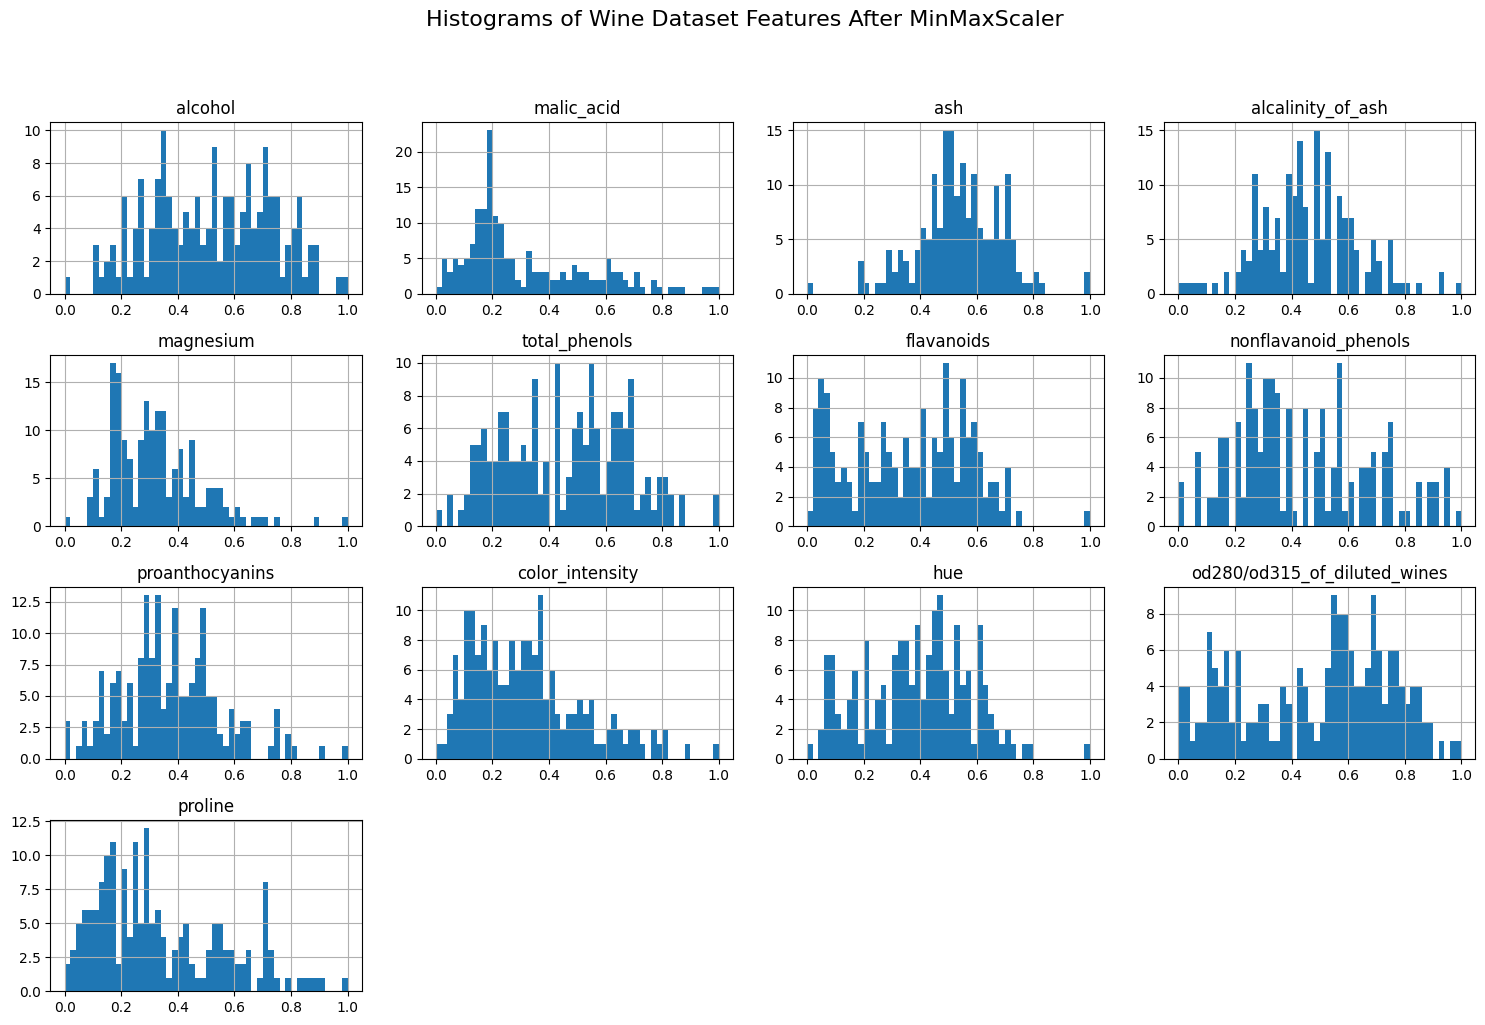

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['Class'] = wine.target

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to features (excluding the target 'Class')
df_scaled = scaler.fit_transform(df_wine.drop(columns=['Class']))

# Convert scaled data back to a DataFrame for plotting
df_scaled = pd.DataFrame(df_scaled, columns=wine.feature_names)

# Plot histograms of the scaled data
df_scaled.hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of Wine Dataset Features After MinMaxScaler', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### Scaling vs. Unscaling the Housing Dataset

In [ ]:
# Load the housing dataset
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define scalers and models
scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR()
}

# Store results: results[model][scaler] = metrics
results = {}

# Iterate over each model
for model_name, model in models.items():
    results[model_name] = {}

    # Iterate over each scaler
    for scaler_name, scaler in scalers.items():
        # Create a fresh model instance for each iteration to avoid state interference
        # Use model.__class__() to get a new instance of the same model type
        current_model = models[model_name].__class__()

        # Scale if needed
        if scaler is None:
             Xtr, Xte = X_train, X_test
        else:
             # Create a fresh scaler instance for each iteration
             # Use scaler.__class__() to get a new instance of the same scaler type
             current_scaler = scalers[scaler_name].__class__()
             Xtr = current_scaler.fit_transform(X_train)
             Xte = current_scaler.transform(X_test)

        # Fit + predict
        current_model.fit(Xtr, y_train)
        y_hat = current_model.predict(Xte)

        # Compute metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_hat))
        r2 = r2_score(y_test, y_hat)

        # Store metrics
        results[model_name][scaler_name] = {
            'RMSE': rmse,
            'R2': r2
        }

# Create tables (nothing to do here)

# RMSE table (lower is better)
rmse_df = pd.DataFrame({
    model: {scaler: results[model][scaler]['RMSE'] for scaler in scalers}
    for model in models
}).T.round(3)

# R^2 table (higher is better)
r2_df = pd.DataFrame({
    model: {scaler: results[model][scaler]['R2'] for scaler in scalers}
    for model in models
}).T.round(3)

display(rmse_df)
display(r2_df)

,None,StandardScaler,MinMaxScaler,Normalizer
LinearRegression,0.746,0.746,0.746,0.990
SVR,1.154,0.597,0.687,1.104


,None,StandardScaler,MinMaxScaler,Normalizer
LinearRegression,0.576,0.576,0.576,0.252
SVR,-0.016,0.728,0.640,0.070


## Summary:

### Data Analysis Key Findings

*   **Optimal Performance:** For the SVR model, `StandardScaler` significantly improved performance, achieving the lowest Root Mean Squared Error (RMSE) of 0.597 and the highest R-squared of 0.728.
*   **Impact of Scaling on SVR:** SVR performed very poorly without scaling (RMSE 1.154, R-squared -0.016) and with `Normalizer` (RMSE 1.104, R-squared 0.070). This highlights the critical importance of proper feature scaling for SVR.
*   **Linear Regression Stability:** `LinearRegression` showed consistent performance across no scaling, `StandardScaler`, and `MinMaxScaler`, with an RMSE of 0.746 and an R-squared of 0.576 for all three.
*   **Ineffectiveness of Normalizer:** The `Normalizer` scaler generally led to worse performance for both models, with `LinearRegression`'s RMSE increasing to 0.990 and R-squared dropping to 0.252, and `SVR` performing better with `StandardScaler` and `MinMaxScaler` than with `Normalizer`.

### Insights

*   Feature scaling is crucial for the performance of Support Vector Regressors (SVR), with `StandardScaler` proving to be the most effective among the tested methods for this dataset.
*   For `LinearRegression`, the impact of `StandardScaler` or `MinMaxScaler` on performance is minimal on this dataset, suggesting it is less sensitive to feature scaling compared to SVR. Further investigation into the specific characteristics of `Normalizer` and why it performed poorly would be beneficial.


# **Extra** (if you have time)

## 3. Working with a messier dataset: **Adult Census Dataset**

Classification task: predict whether income >50K

### 3.1 Exploratory data analysis
Same as before, analyse the dataset to identify the necessary preprocessing steps.

In [ ]:
import pandas as pd # Ensure pandas is imported as well, though it's already in 7e0eca34

# Naming the Columns as per UCI Adult dataset documentation
# Column 4 is 'education_level' (textual), Column 5 is 'education_num' (numerical)
names = ['age', 'workclass', 'fnlwgt', 'education_level', 'education_num',
         'marital-status', 'occupation', 'relationship', 'race', 'sex',
         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
         'y']

# Load dataset with specifying ' ?' as missing values and explicitly no header
df = pd.read_csv('adult.data', delimiter=',', names=names, na_values=' ?', header=None)

# Drop the numerical education column, keeping the categorical 'education_level' for encoding
df = df.drop(columns=['education_num'])

# Number of observations
print("Number of observations: ", len(df))

# Look at sample of data
df.head(5)

Number of observations:  32561


,age,workclass,fnlwgt,education_level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Basis statistics

In [ ]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


Is the datset balanced?

In [ ]:
print("Dataset balance: ", df['y'].value_counts())

Dataset balance:  y
<=50K    24720
>50K      7841
Name: count, dtype: int64


Disribution of features and relationship to target variabe

> Hint: plot feature distribution stratified on the predictor variable

> Inspect the range and cardinality of the different features. Is the range consistent across the numerical features? How many categories do categorical variables have?


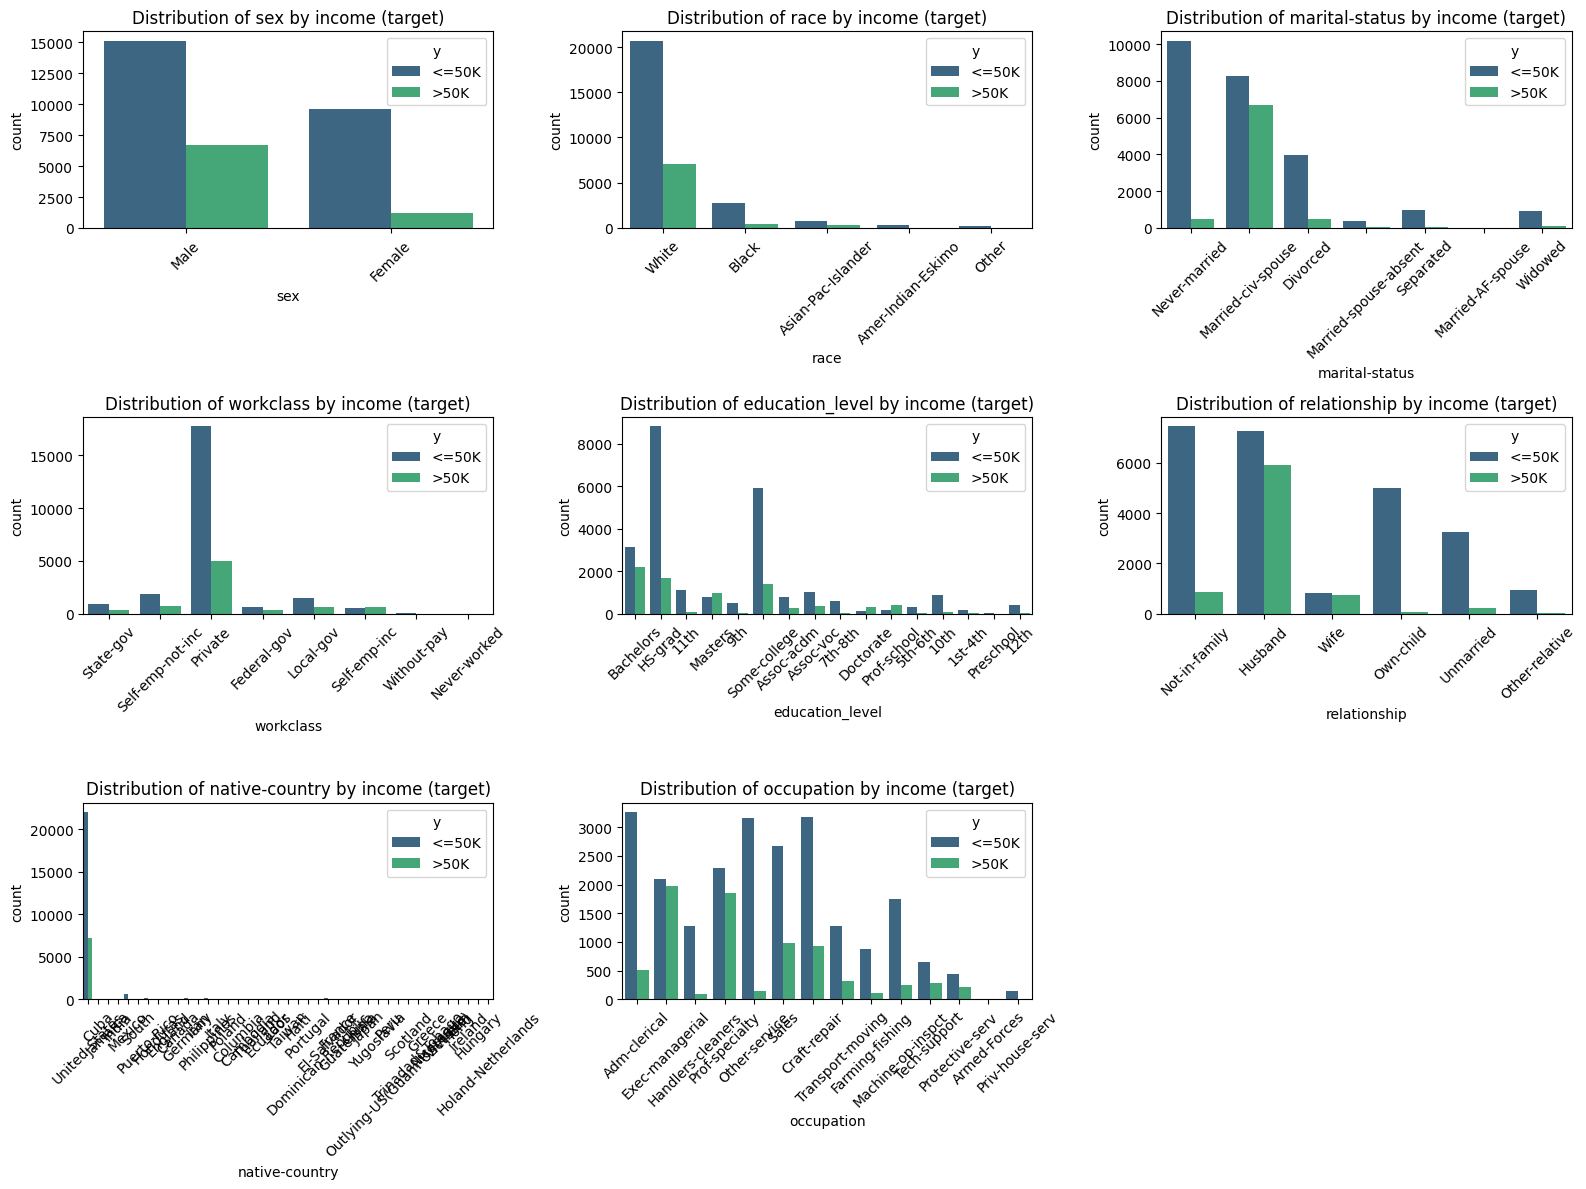

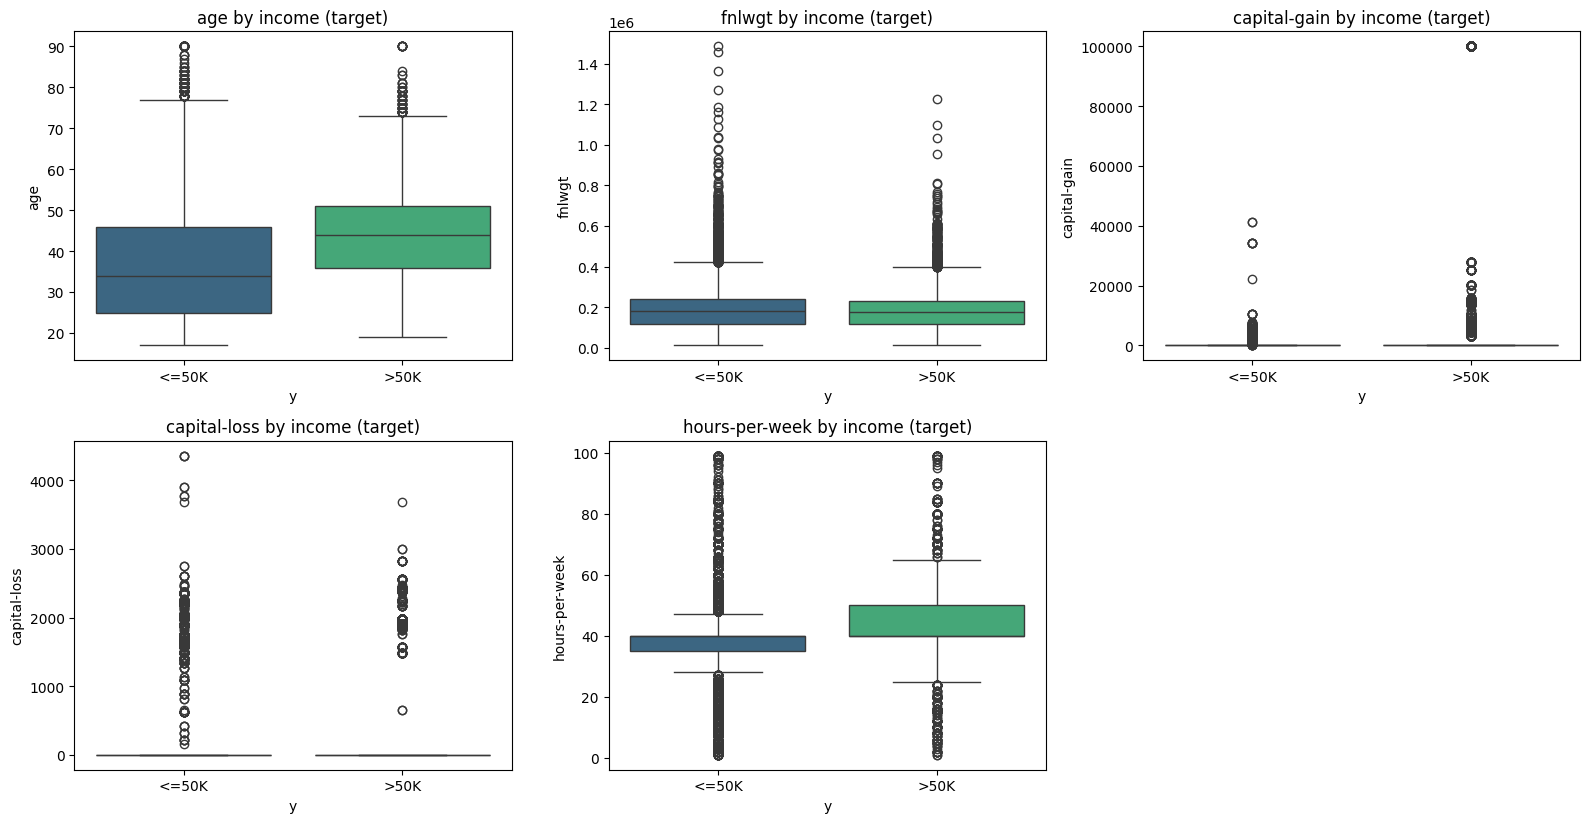

In [ ]:
# using unique index
df_plot = df.reset_index(drop=True)

categorical_columns = ['sex', 'race', 'marital-status', 'workclass', 'education_level',
                    'relationship', 'native-country', 'occupation']
num_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Categorical features: bar plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_plot, x=col, hue='y', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by income (target)')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Numerical features: box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(data=df_plot, x='y', y=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{col} by income (target)')

for j in range(len(num_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Key Findings from Feature Distributions Stratified by Income:

**1. Numerical Features (Box Plots)**

1.1 Age: Individuals in the >50K income group generally have a higher median age and a wider distribution compared to the <=50K group, suggesting that age and experience are positively correlated with higher income.

1.2 Fnlwgt (Final Weight): The distribution of fnlwgt appears similar across both income groups, indicating it might not be a strong direct predictor of income, which is expected as it's a sampling weight.

1.3 Capital-gain & Capital-loss: These features show significant differences. The >50K income group has substantially higher values for capital-gain (and to a lesser extent, capital-loss), with many more non-zero entries compared to the <=50K group, where these values are predominantly zero. This highlights the strong influence of investments and other non-wage income on overall income level.

1.4 Hours-per-week: The >50K income group tends to work more hours per week on average, with a higher median and a more concentrated distribution at higher work hours, compared to the <=50K group.

2. **Categorical Features (Count Plots)**

2.1 Education: There's a very clear positive correlation between higher education levels (e.g., 'Bachelors', 'Masters', 'Doctorate', 'Prof-school') and the likelihood of earning >50K. Conversely, lower education levels are overwhelmingly associated with <=50K income.

2.2 Marital-status: Individuals who are 'Married-civ-spouse' are disproportionately represented in the >50K income bracket, while 'Never-married' individuals are more likely to be in the <=50K group.

2.3 Occupation: Specific occupations, notably 'Exec-managerial' and 'Prof-specialty', show a much higher proportion of individuals earning >50K. Other occupations like 'Handlers-cleaners', 'Farming-fishing', and 'Other-service' are predominantly in the <=50K category.

2.4 Relationship: 'Husband' is a strong indicator for >50K income, aligning with the 'Married-civ-spouse' observation.
Sex: Males show a considerably higher proportion of >50K income earners compared to females.

2.5 Workclass: 'Private' is the most common workclass for both groups, but 'Self-emp-inc', 'Federal-gov', and 'Local-gov' have a higher relative proportion of >50K earners.

2.6 Race & Native-country: 'White' and 'Asian-Pac-Islander' races tend to have a higher proportion of >50K earners. For 'native-country', 'United-States' dominates both income groups, and while some other countries show individuals in the >50K bracket, the smaller sample sizes make direct comparisons less robust.

In summary, the plots reveal significant relationships between demographic and employment-related features and income levels. Features like education, occupation, marital status, age, capital gains, and hours worked per week are strong indicators for predicting income bracket.

Check for missing values

In [ ]:
print(df.isnull().sum())

age                     0
workclass            1836
fnlwgt                  0
education_level         0
marital-status          0
occupation           1843
relationship            0
race                    0
sex                     0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country        583
y                       0
education_encoded       0
dtype: int64


In [ ]:
# Example the 15th row of the DataFrame - notice NaN
row_15 = df.iloc[14]
print(row_15)

age                                  40
workclass                       Private
fnlwgt                           121772
education_level               Assoc-voc
marital-status       Married-civ-spouse
occupation                 Craft-repair
relationship                    Husband
race                 Asian-Pac-Islander
sex                                Male
capital-gain                          0
capital-loss                          0
hours-per-week                       40
native-country                      NaN
y                                  >50K
education_encoded                  10.0
Name: 14, dtype: object


### 3.2 Data preprocessing
Based on the EDA, what type of preprocessing is needed?

1. **Do features need to be scaled and encoded?**

- Scaling: Yes, numerical features will need scaling. As observed from the df.describe() output and general understanding of these variables, age, fnlwgt, capital-gain, capital-loss, and hours-per-week have vastly different ranges. For instance, fnlwgt values are in the hundreds of thousands, while age is in tens. Scaling these features (e.g., using StandardScaler or MinMaxScaler) will prevent features with larger magnitudes from disproportionately influencing models, especially distance-based algorithms.

- Encoding: Yes, categorical features definitely need encoding. The dataset contains several categorical features (workclass, education, marital-status, occupation, relationship, race, sex, native-country).

- Ordinal Encoding: education appears to have an inherent order (e.g., 'Preschool' to 'Doctorate'), so OrdinalEncoder would be appropriate, preserving the rank among categories.

- One-Hot Encoding: For nominal categorical features like workclass, marital-status, occupation, relationship, race, sex, and native-country, OneHotEncoder is suitable to avoid imposing an arbitrary ordinal relationship between categories.
Target Variable Encoding: The target variable y ('<=50K', '>50K') is categorical and binary, so it will need to be encoded, typically to 0 and 1, using LabelEncoder.

2. **Do missing values need to be imputed?**

Yes, missing values need to be handled. The df.isnull().sum() output indicated missing values in age, workclass, occupation, and native-country. These missing values must be imputed before training most machine learning models. Common imputation strategies include:

- Dropping Rows: For demonstration or if the number of missing values is very small relative to the dataset size, rows with missing values can be dropped.
- Mean/Median Imputation: For numerical features (age), replacing missing values with the mean or median is a simple strategy.
- Mode Imputation: For categorical features (workclass, occupation, native-country), replacing missing values with the most frequent category (mode) is often used.


More Advanced Imputation Techniques like K-Nearest Neighbors (KNN) imputation could also be considered for a more sophisticated approach.
In summary, the Adult Census Dataset requires significant preprocessing, including handling missing values through imputation, and extensive feature engineering through scaling of numerical features and encoding of categorical features, to prepare it for machine learning models.

A quick data fix

In [ ]:
# For now, we will drop the rows with missing (NA) values
df = df.dropna()
len(df)

30162

In [ ]:
# Task: Get the unique values in the race and y column
df['race'].unique()
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [ ]:
# We see redundant space prefix in the values. Remove them.
df['race'] = df['race'].apply(lambda x: x.strip())

/tmp/ipython-input-3973140307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'] = df['race'].apply(lambda x: x.strip())


In [ ]:
df['race'].unique(), df['y'].unique(), df['occupation'].unique()

(array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
        'Other'], dtype=object),
 array(['<=50K', '>50K'], dtype=object),
 array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
        'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
        'Craft-repair', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object))

Hmmm it's not just the race and y column.

In [ ]:
# Let's try to apply this to all the string-valued columns
for col_name in df.columns:
    if df[col_name].dtype == object:  # Checking for object type (string in pandas)
        df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-1206407335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x)


Check the data

In [ ]:
for col_name in df.columns:
    if not 'int' in str(df[col_name].dtype):
        print(df[col_name].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal

All done! You can now start data preprocessing such as encoding and imputation.

#### **TASK 1: Encoding categorical variables** (label/ordinal encoding & one-hot encoding)

Important: We need special care when we are encoding categorical variables

**1. Take care of the missing values**
- Beware not to encode missing values unless you are intending to do so.
- Sometimes you want to encode missing values to a separate cateogory. For example, when you want to predict if passengers of titanic had survived or not, missing data of certain features can actually have meaning, i.e., Cabin information can be missing because the body was not found.

**2. Know which encoding and scaling method you should select**
- If your categories are ordinal, then it makes sense to use a LabelEncoder with a MinMaxScaler. For example, you can encode [low, medium, high], as [1,2,3], i.e., distance between low to high is larger than that of medium and high.

- However, if you have non-ordinal categorical values, like [White, Hispanic, Black, Asian], then it would be better to use a OneHotEncoder instead of forcing ordinality with a LabelEncoder. Otherwise the algorithms you use (especially distance based algorithms like KNN) will make the assumption that the distance between White and Asian is larger than White and Hispanic, which is nonsensical.

**3. Split before you encode to avoid data leakage**
- If training a model using train/ test slit, you should split the dataset before you encode your data. It is natural for algorithms to see unknown values in the validation/test set that was not appearing in the train set. `sklearn.preprocessing.OneHotEncoder` is good at handling these unknown categories (`handle_unknown` parameter).

- Discussion: What if you are certain about all the possible categories that can appear for each feature? Can you encode all the values before splitting the dataset into train and test set?


This notebook shows the three points in the following sections with examples.

In [ ]:
# Import encoders from sklearn
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [ ]:
# Ordinal Encoding for 'education_level'
# Define the order of education categories
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']
# Initialize the OrdinalEncoder with the specified categories
ordinal_encoder = OrdinalEncoder(categories=[education_order])
# Apply the OrdinalEncoder to the 'education_level' column
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education_level']])

# Check resulting education ordering
edu_map = {}
for i, row in df[["education_level", "education_encoded"]].iterrows():
    education = row["education_level"]
    edu_num = row["education_encoded"]

    if education not in edu_map:
        edu_map.update({education: edu_num})
    else:
        assert edu_map[education] == edu_num
edu_map

/tmp/ipython-input-2836621349.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_encoded'] = ordinal_encoder.fit_transform(df[['education_level']])


{'Bachelors': 13.0,
 'HS-grad': 8.0,
 '11th': 6.0,
 'Masters': 14.0,
 '9th': 4.0,
 'Some-college': 9.0,
 'Assoc-acdm': 11.0,
 '7th-8th': 3.0,
 'Doctorate': 15.0,
 'Assoc-voc': 10.0,
 'Prof-school': 12.0,
 '5th-6th': 2.0,
 '10th': 5.0,
 'Preschool': 0.0,
 '12th': 7.0,
 '1st-4th': 1.0}

In [ ]:
# OneHotEncoding for nominal features without an implied order
# Including the previously missed nominal columns
nominal_columns = ['workclass', 'occupation', 'native-country', 'marital-status', 'relationship', 'race', 'sex']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded_columns = onehot_encoder.fit_transform(df[nominal_columns])
column_names = onehot_encoder.get_feature_names_out(nominal_columns)
df_onehot_encoded = pd.DataFrame(onehot_encoded_columns, columns=column_names)

# Integrate these new columns back into the original dataframe
df = df.reset_index(drop=True)  # Reset index to align with the new onehot encoded DataFrame
df = pd.concat([df, df_onehot_encoded], axis=1)

# Optionally, remove the categorical columns if no longer needed
df.drop(columns=nominal_columns + ['education_level'], inplace=True)

# Label Encoding for the target variable
label_encoder = LabelEncoder()
df['y_encoded'] = label_encoder.fit_transform(df['y'])

# Remove the original 'y' column if no longer needed
df.drop(columns=['y'], inplace=True)

Check your encoding results

In [ ]:
# Display the first few rows of the modified DataFrame
df.head(10)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education_encoded,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,y_encoded
0,39,77516,2174,0,40,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,50,83311,0,0,13,13.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,38,215646,0,0,40,8.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,53,234721,0,0,40,6.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,28,338409,0,0,40,13.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
5,37,284582,0,0,40,14.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
6,49,160187,0,0,16,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
7,52,209642,0,0,45,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
8,31,45781,14084,0,50,14.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
9,42,159449,5178,0,40,13.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


#### **TASK 2: Dealing with missing data** - imputation strategies

In processing the data earlier, we did not take account of the missing values.

In [ ]:
# Re-Load dataset with specifying ' ?' as missing values
df = pd.read_csv('adult.data', delimiter=',', names=names, na_values=' ?')
# Remove redundant space (same as before)
for col_name in df.columns:
    if df[col_name].dtype == object:  # Checking for object type (string in pandas)
        df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x) # Remove redundant space

**Task**: Create 3 train/test datasets using different methods for dealing with missing data:
<br>A: Drop missing values, B: KNN imputation, C: Most frequent imputation


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def train_test_split_df(df, test_ratio=0.3, target_col="y", random_state=42):
    # Separate features and target
    df_data = df.drop(columns=[target_col])
    df_target = df[target_col]

    # Randomized train-test split with a fixed seed
    train_X_df, test_X_df, train_y_df, test_y_df = train_test_split(
        df_data, df_target, test_size=test_ratio, random_state=random_state
    )

    # Convert target variable to binary (assuming it's categorical with ">50K" and others)
    train_y_df = np.where(train_y_df == ">50K", 1, 0)
    test_y_df = np.where(test_y_df == ">50K", 1, 0)

    return train_X_df, train_y_df, test_X_df, test_y_df

# Split your data into train and test splits (these are the original, untouched splits)
original_train_X, original_train_y, original_test_X, original_test_y = train_test_split_df(df)

print(len(original_train_X))
print(len(original_train_y))
print(len(original_test_X))
print(len(original_test_y))

22792
22792
9769
9769


In [ ]:
# Check for missing values
print(train_X.isnull().sum())
print(test_X.isnull().sum())

age                   0
workclass          1267
fnlwgt                0
education_level       0
education_num         0
marital-status        0
occupation         1274
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      405
dtype: int64
age                  0
workclass          569
fnlwgt               0
education_level      0
education_num        0
marital-status       0
occupation         569
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     178
dtype: int64


Step 1: encode features without missing values
<br> `native-country`, `occupation` and `workclass` have missing values, so we first need to impute them before encoding

In [ ]:
# Ordinal Encoding for 'education_level'
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
                   '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
                   'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])

# Create copies to work on for base encoding
train_X_base = original_train_X.copy()
test_X_base = original_test_X.copy()

train_X_base['education_encoded'] = ordinal_encoder.fit_transform(train_X_base[['education_level']])
test_X_base['education_encoded'] = ordinal_encoder.transform(test_X_base[['education_level']])

# OneHotEncoding for nominal features without missing values and without an implied order
nominal_columns_without_missing = ['marital-status', 'relationship', 'race', 'sex']
onehot_encoder_base = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

train_onehot_encoded_base = onehot_encoder_base.fit_transform(train_X_base[nominal_columns_without_missing])
test_onehot_encoded_base = onehot_encoder_base.transform(test_X_base[nominal_columns_without_missing])

# Create DataFrames for one-hot encoded columns, maintaining original indices for later alignment
train_onehot_df_base = pd.DataFrame(train_onehot_encoded_base, columns=onehot_encoder_base.get_feature_names_out(nominal_columns_without_missing), index=train_X_base.index)
test_onehot_df_base = pd.DataFrame(test_onehot_encoded_base, columns=onehot_encoder_base.get_feature_names_out(nominal_columns_without_missing), index=test_X_base.index)

# Concatenate encoded features with the base dataframes
train_X_base = pd.concat([train_X_base, train_onehot_df_base], axis=1)
test_X_base = pd.concat([test_X_base, test_onehot_df_base], axis=1)

# Drop the original nominal (without missing) and 'education_level' columns
train_X_base.drop(columns=nominal_columns_without_missing + ['education_level'], inplace=True)
test_X_base.drop(columns=nominal_columns_without_missing + ['education_level'], inplace=True)

# train_X_base and test_X_base now contain: numerical features, education_num, education_encoded,
# and OHE for marital-status, relationship, race, sex.
# They still contain NaNs for 'workclass', 'occupation', 'native-country'.

# Verify the transformed datasets
print("Training data (X_base) head after initial encoding:")
print(train_X_base.head())
print("\nMissing values in X_base after initial encoding:")
print(train_X_base.isnull().sum()[train_X_base.isnull().sum() > 0])

Training data (X_base) head after initial encoding:
       age         workclass  fnlwgt  education_num       occupation  \
19749   34  Self-emp-not-inc   56460              9  Farming-fishing   
1216    48  Self-emp-not-inc  243631             10     Craft-repair   
27962   23         State-gov   56402             10   Prof-specialty   
23077   56         Local-gov  255406              9  Exec-managerial   
10180   17           Private  297246              7  Priv-house-serv   

       capital-gain  capital-loss  hours-per-week native-country  \
19749             0          2179              12  United-States   
1216           7688             0              40  United-States   
27962             0             0              30  United-States   
23077             0             0              40  United-States   
10180             0             0               9  United-States   

       education_encoded  ...  relationship_Not-in-family  \
19749                8.0  ...                

**Dataset A:** drop missing values (same as dataset in Task 1).

In [ ]:
# A: Dataset with dropped missing values
# Start from the base encoded dataframes and drop rows with missing values
train_X_dropna_processed = train_X_base.copy().dropna()
test_X_dropna_processed = test_X_base.copy().dropna()

# Convert original_train_y and original_test_y to pandas Series to allow indexing by DataFrame index
train_y_series = pd.Series(original_train_y, index=original_train_X.index)
test_y_series = pd.Series(original_test_y, index=original_test_X.index)

# Align the target variables by slicing with the indices of the processed dataframes
train_y_dropna_processed = train_y_series.loc[train_X_dropna_processed.index]
test_y_dropna_processed = test_y_series.loc[test_X_dropna_processed.index]

# Verify missing values in the resulting datasets
print("Missing values in training data (dropna processed):")
print(train_X_dropna_processed.isnull().sum().sum())

print("\nMissing values in testing data (dropna processed):")
print(test_X_dropna_processed.isnull().sum().sum())

# Display dataset lengths after dropping rows with missing values
print(f"\nDataset length after dropping rows (train): {len(train_X_dropna_processed)}")
print(f"Dataset length after dropping rows (test): {len(test_X_dropna_processed)}")

Missing values in training data (dropna processed):
0

Missing values in testing data (dropna processed):
0

Dataset length after dropping rows (train): 21133
Dataset length after dropping rows (test): 9029


**Dataset B:** Most frequent imputation

In [ ]:
from sklearn.impute import SimpleImputer

# Columns with missing values (workclass, occupation, native-country) from X_base
columns_with_missing_values = ['workclass', 'occupation', 'native-country']

# Dataset B: Most frequent imputation
# Start from the base encoded dataframes and impute missing values
train_X_mode_imputed = train_X_base.copy()
test_X_mode_imputed = test_X_base.copy()

# Create an imputer object using the most frequent strategy and fit on training data
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_imputer.fit(train_X_mode_imputed[columns_with_missing_values])

train_X_mode_imputed[columns_with_missing_values] = mode_imputer.transform(train_X_mode_imputed[columns_with_missing_values])
test_X_mode_imputed[columns_with_missing_values] = mode_imputer.transform(test_X_mode_imputed[columns_with_missing_values])

# The target variables for mode imputation remain the original ones as no rows were dropped
train_y_mode_imputed = original_train_y.copy()
test_y_mode_imputed = original_test_y.copy()

# Verify missing values in the resulting datasets
print("Missing values in training data (mode imputed):")
print(train_X_mode_imputed.isnull().sum().sum())

print("\nMissing values in testing data (mode imputed):")
print(test_X_mode_imputed.isnull().sum().sum())

Missing values in training data (mode imputed):
0

Missing values in testing data (mode imputed):
0


Now that we have done data imputation, we can **encode the columns that had missing values** (`native-country`, `occupation` and `workclass`).  



> What type(s) of encoding is appropriate here?



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Function to perform one-hot encoding
def apply_onehot_encoding(train_df, test_df, columns, encoder=None):
    # Fit OneHotEncoder on training data if no encoder is passed
    if encoder is None:
        encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore') # Use drop='first' to avoid multicollinearity
        encoder.fit(train_df[columns])

    # Transform both training and testing datasets
    train_encoded = encoder.transform(train_df[columns])
    test_encoded = encoder.transform(test_df[columns])

    # Create DataFrames for the encoded columns, maintaining original indices
    column_names = encoder.get_feature_names_out(columns)
    train_encoded_df = pd.DataFrame(train_encoded, columns=column_names, index=train_df.index)
    test_encoded_df = pd.DataFrame(test_encoded, columns=column_names, index=test_df.index)

    # Drop original columns and concatenate new encoded ones
    train_df_final = pd.concat([train_df.drop(columns=columns, axis=1), train_encoded_df], axis=1)
    test_df_final = pd.concat([test_df.drop(columns=columns, axis=1), test_encoded_df], axis=1)

    return train_df_final, test_df_final, encoder


# Columns to encode (these are the ones that had missing values and were just imputed/dropped)
columns_to_encode_missing = ['workclass', 'occupation', 'native-country']

# --- Apply one-hot encoding for the Dropna dataset (Dataset A) ---
train_X_dropna_final_encoded, test_X_dropna_final_encoded, dropna_encoder = apply_onehot_encoding(
    train_X_dropna_processed.copy(), test_X_dropna_processed.copy(), columns_to_encode_missing
)

# --- Apply one-hot encoding for the Mode Imputed dataset (Dataset B) ---
train_X_mode_final_encoded, test_X_mode_final_encoded, mode_encoder = apply_onehot_encoding(
    train_X_mode_imputed.copy(), test_X_mode_imputed.copy(), columns_to_encode_missing
)

# Verify if any missing values remain after encoding
print("Missing values in dropna-encoded training data:", train_X_dropna_final_encoded.isnull().sum().sum())
print("Missing values in dropna-encoded testing data:", test_X_dropna_final_encoded.isnull().sum().sum())

print("\nMissing values in mode-encoded training data:", train_X_mode_final_encoded.isnull().sum().sum())
print("Missing values in mode-encoded testing data:", test_X_mode_final_encoded.isnull().sum().sum())

Missing values in dropna-encoded training data: 0
Missing values in dropna-encoded testing data: 0

Missing values in mode-encoded training data: 0
Missing values in mode-encoded testing data: 0


### 3.3 Train a classifier to predict outcome

Example: SVM or KNN Classifier

**Task**: Train a classifier on the different datasets to compare imputation method accuracy.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Non-categorical features to scale
non_categorical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'education_num', 'education_encoded']

def scale_features(train_X, test_X, features_to_scale):
    scaler = StandardScaler()

    # Fit scaler on training data and transform both train and test sets
    train_scaled = scaler.fit_transform(train_X[features_to_scale])
    test_scaled = scaler.transform(test_X[features_to_scale])

    # Replace scaled features in the original DataFrame, maintaining indices
    train_X_scaled = train_X.copy()
    test_X_scaled = test_X.copy()
    train_X_scaled[features_to_scale] = pd.DataFrame(train_scaled, index=train_X.index, columns=features_to_scale)
    test_X_scaled[features_to_scale] = pd.DataFrame(test_scaled, index=test_X.index, columns=features_to_scale)

    return train_X_scaled, test_X_scaled


# Define classifiers
classifiers = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Datasets for each imputation type (now using the explicitly prepared dataframes)
datasets = {
    'Dropna': (train_X_dropna_final_encoded, train_y_dropna_processed, test_X_dropna_final_encoded, test_y_dropna_processed),
    'Mode Imputation': (train_X_mode_final_encoded, train_y_mode_imputed, test_X_mode_final_encoded, test_y_mode_imputed)
}

# Store results
results = []

# Train and test classifiers on each dataset
for imputation_type, (train_X_curr, train_y_curr, test_X_curr, test_y_curr) in datasets.items():
    # Apply scaling to non-categorical features
    train_X_scaled, test_X_scaled = scale_features(train_X_curr, test_X_curr, non_categorical_features)

    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(train_X_scaled, train_y_curr)

        # Predict on the test set
        y_pred = classifier.predict(test_X_scaled)

        # Calculate accuracy
        accuracy = accuracy_score(test_y_curr, y_pred)

        # Append the result
        results.append({
            'Imputation Type': imputation_type,
            'Classifier': classifier_name,
            'Accuracy': accuracy
        })
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Pivot the DataFrame to organize results by Imputation Type and Classifier
pivot_df = results_df.pivot(index='Imputation Type', columns='Classifier', values='Accuracy')

# Display the table
print("\nClassifier Performance Across Imputation Types with Scaling:")
print(pivot_df.to_string(float_format="%.2f")) # Display with two decimal places


Classifier Performance Across Imputation Types with Scaling:
Classifier       KNN  SVM
Imputation Type          
Dropna          0.83 0.85
Mode Imputation 0.83 0.86
